In [1]:
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
     
    dictionary = Counter(all_words)
    # Paste code for non-word removal here(code snippet is given below) 
    list_to_remove = dictionary.keys()
    for item in list_to_remove:
        if item.isalpha() == False: 
            dictionary[item]=0
        elif len(item) == 1:
            dictionary[item]=0
    # end of clear
    # choose the words which frequecy > 20 as feature
    # copy new_dict
    new_dict = dictionary.copy()
    # delete the freq < 20 in new dict
    for word,freq in dictionary.items():
        if freq < 20:
            del new_dict[word]
    return new_dict

In [2]:
def extract_features(mail_dir): 
    files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files),3000))
    docID = 0;
    for fil in files:
      with open(fil) as fi:
        for i,line in enumerate(fi):
          if i == 2:
            words = line.split()
            for word in words:
              wordID = 0
              for i,d in enumerate(dictionary):
                if d[0] == word:
                  wordID = i
                  features_matrix[docID,wordID] = words.count(word)
        docID = docID + 1    
    return features_matrix

In [3]:
import os
import numpy as np
from collections import Counter
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix 
# Create a dictionary of words with its frequency
 
train_dir = './lingspam_public/lemm_stop/part1/'
dictionary = make_Dictionary(train_dir)
 
# Prepare feature vectors per training mail and its labels
 
train_labels = np.zeros(289)
train_labels[-48:] = 1
train_matrix = extract_features(train_dir)
 
# Training SVM and Naive bayes classifier
 
model = MultinomialNB()
model.fit(train_matrix,train_labels)

 
# Test the unseen mails for Spam
test_dir = './lingspam_public/lemm_stop/part9/'
test_matrix = extract_features(test_dir)
test_labels = np.zeros(289)
test_labels[-48:] = 1
result = model.predict(test_matrix)
print(confusion_matrix(test_labels,result))

[[227  14]
 [ 46   2]]


In [4]:
print((227+2)/289)

0.7923875432525952


Confusion matrix, without normalization
[[227  14]
 [ 46   2]]
Normalized confusion matrix
[[0.94 0.06]
 [0.96 0.04]]


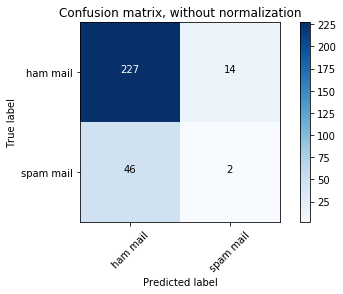

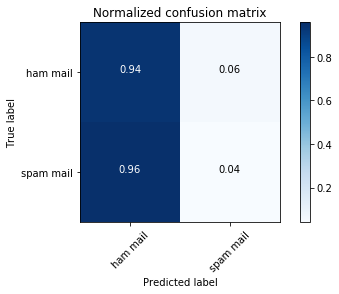

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, result)
np.set_printoptions(precision=2)

class_names=['ham mail', 'spam mail']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()